<a href="https://colab.research.google.com/github/pornpailinjanjit/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [2]:
data = pd.read_csv('search_request.csv', encoding='iso-8859-11')
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18.0,12.634739,101.463177
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10.0,14.800882,102.533777
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8.0,13.738260,100.371405
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12.0,12.666877,101.860838
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14.0,12.237242,99.879998
...,...,...,...,...,...,...,...,...,...,...
158519,158523,b10cb83d-00c2-4b67-a65e-e1c771cb206b,2018-06-22 18:30:33.723,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,10544.0,75hk2qb5o28t78jero3vnl2ntg,6.0,13.765177,100.444316
158520,158524,30e0a4b2-4d04-4364-921f-3ab31e425254,2018-06-22 16:41:02.213,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,88323.0,jmhmf0bpo848rm0icgv34vdnf,6.0,13.860465,100.582132
158521,158525,fd39c8fd-221e-41c6-ac8f-621718d0c3ea,2018-06-22 19:23:13.647,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,7033.0,35skidiqoi980rpqmphuj8t07o,6.0,16.809418,100.260902
158522,158526,3a885bf2-0cf3-4ac2-a05a-5e992c219c45,2018-06-22 18:01:19.722,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,143772.0,1sfnmmceoa90rauvc0mi9bbfof,6.0,13.272873,100.922034


#เตรียมข้อมูล

### แกปลงข้อมูลบอกเวลาให้เป็นตัวแปรชนิด datetime

In [3]:
data['search_timestamp']= pd.to_datetime(data['search_timestamp'],dayfirst=True,errors ='coerce') #เปลี่ยนstring เป็นdatetime
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18.0,12.634739,101.463177
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10.0,14.800882,102.533777
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8.0,13.738260,100.371405
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12.0,12.666877,101.860838
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14.0,12.237242,99.879998
...,...,...,...,...,...,...,...,...,...,...
158519,158523,b10cb83d-00c2-4b67-a65e-e1c771cb206b,2018-06-22 18:30:33.723,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,10544.0,75hk2qb5o28t78jero3vnl2ntg,6.0,13.765177,100.444316
158520,158524,30e0a4b2-4d04-4364-921f-3ab31e425254,2018-06-22 16:41:02.213,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,88323.0,jmhmf0bpo848rm0icgv34vdnf,6.0,13.860465,100.582132
158521,158525,fd39c8fd-221e-41c6-ac8f-621718d0c3ea,2018-06-22 19:23:13.647,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,7033.0,35skidiqoi980rpqmphuj8t07o,6.0,16.809418,100.260902
158522,158526,3a885bf2-0cf3-4ac2-a05a-5e992c219c45,2018-06-22 18:01:19.722,okhttp/3.9.0;WongnaiAndroid 8.16.7;samsung;SM-...,NaN,143772.0,1sfnmmceoa90rauvc0mi9bbfof,6.0,13.272873,100.922034


#Bar chart (กราฟแท่ง)
กราฟเปรียบเทียบปริมาณ

In [4]:
from matplotlib import pyplot as plt

In [5]:
mon = data[data['search_timestamp'].dt.dayofweek == 0].count()
tue = data[data['search_timestamp'].dt.dayofweek == 1].count()
wen = data[data['search_timestamp'].dt.dayofweek == 2].count()
thu = data[data['search_timestamp'].dt.dayofweek == 3].count()
fri = data[data['search_timestamp'].dt.dayofweek == 4].count()
sat = data[data['search_timestamp'].dt.dayofweek == 5].count()
son = data[data['search_timestamp'].dt.dayofweek == 6].count()

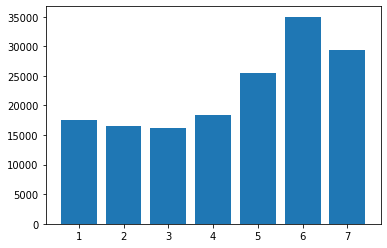

In [6]:
plt.bar([1,2,3,4,5,6,7],[mon.iloc[2],tue.iloc[2],wen.iloc[2],thu.iloc[2],fri.iloc[2],sat.iloc[2],son.iloc[2]]);

In [8]:
data[data['search_timestamp'].dt.dayofweek == 0].shape[0]

17605

<BarContainer object of 7 artists>

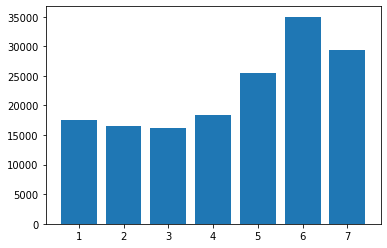

In [7]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                        ])

ส่วนประกอบขิงกราฟแท่ง
* ตัวกราฟแท่ง(height)
* ตำแหน่งกราฟแท่ง(x)
* ชื่อแท่ง (tick_label)
* ชื่อกราฟ(plt.title)
* ชื่อแกน x (plt.xlabel)
* ชื่อแกน y (plt.ylabel)

Text(0, 0.5, 'Number of Requests')

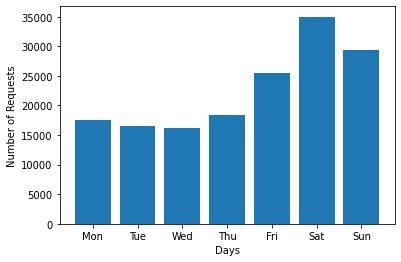

In [9]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                        data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                        ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')


In [10]:
import matplotlib
matplotlib.__version__

'3.2.2'

# การแสดงตัวอักษรภาษาไทยในกราฟ

https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [11]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [12]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

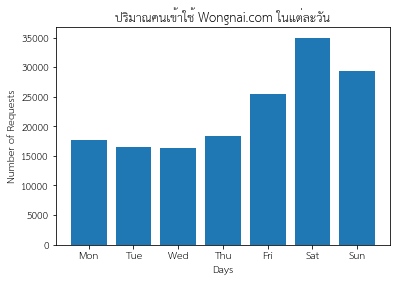

In [13]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

#Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [14]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

1116

In [15]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]
b4lunch

[1116, 1055, 1082, 1181, 1885, 2897, 2882]

In [16]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

360

In [17]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[360, 355, 349, 423, 635, 707, 395]

In [18]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [19]:
import numpy as np

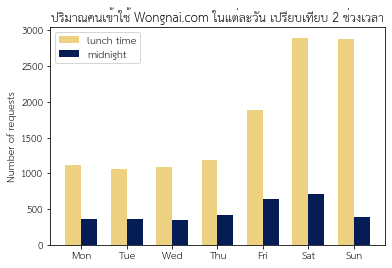

In [20]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#edd080')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#061c54')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Stacked bar chart

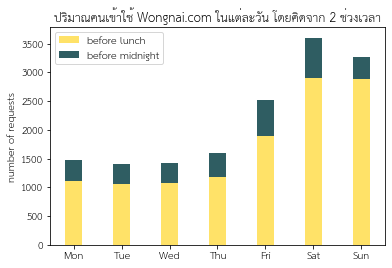

In [21]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#ffe268')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#2f5d62')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

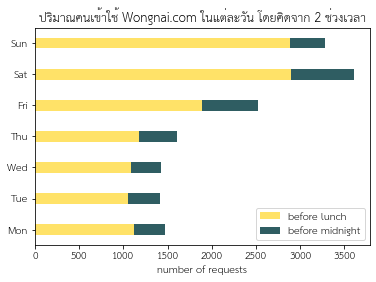

In [22]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#ffe268')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#2f5d62')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

[เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

In [23]:
labels = ['Lunch','Midnight']

NameError: ignored

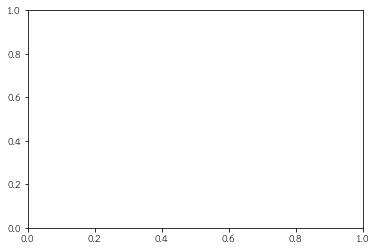

In [24]:
A = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(A - width/2, lunch, width, label='lunch_time', color ='#ffe268')
rects2 = ax.bar(A + width/2,midnight, width, label='Midnight', color = '#31326f')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

# Histogram

##กราฟแสดงความถี่ของข้อมูล
ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100 และ stdev = 15

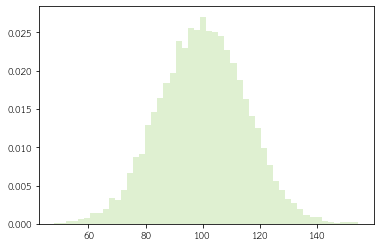

In [25]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2021)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = '#d5ecc2', alpha = 0.75);

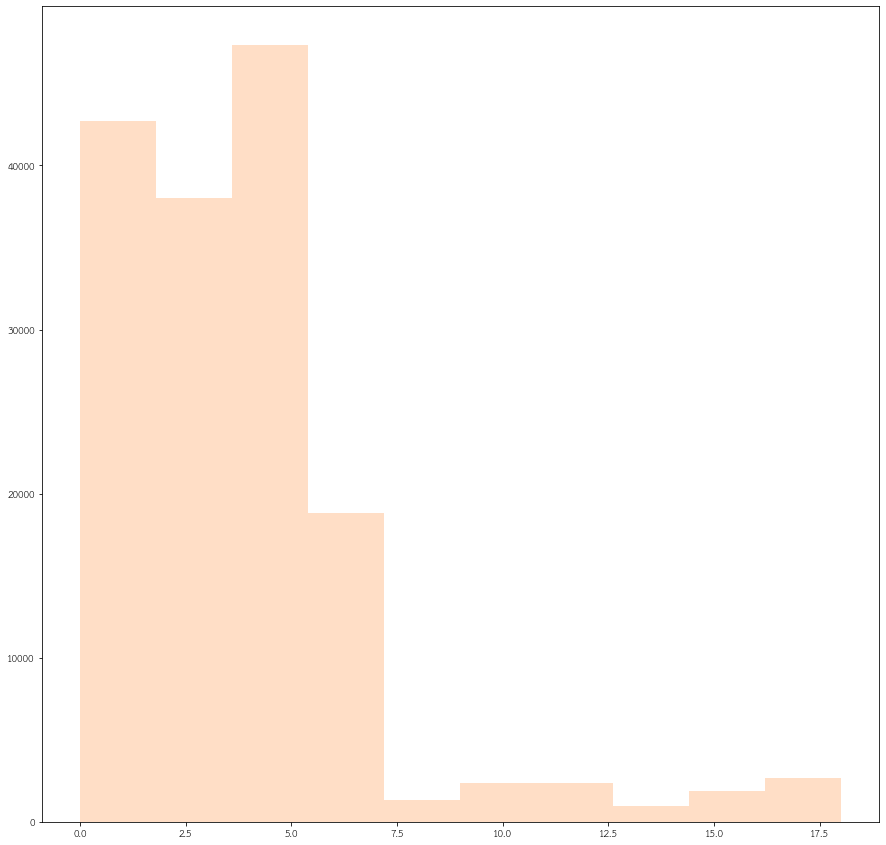

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = '#ffd3b4' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [27]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result           float64
lat                        float64
long                       float64
dtype: object

In [28]:
type(data['number_of_result'][0])

numpy.float64

ตรวจสอบ data type ของตัวแปร



In [29]:
type(data['number_of_result'][0]) == int

False

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [30]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')

In [41]:
new_type = data['number_of_result'].astype('int32') #error

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [31]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [33]:
data = data.drop(150000)

In [37]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [36]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

In [37]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

NameError: ignored

ลบ outlier

In [38]:
new_type_nooutlier = new_type[new_type < 25]

NameError: ignored

In [39]:
new_type.shape[0] - new_type_nooutlier.shape[0]

NameError: ignored

In [40]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

NameError: ignored

##Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [41]:
output

(array([42731., 37991., 47325., 18818.,  1339.,  2385.,  2368.,   985.,
         1906.,  2675.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

In [42]:
output[0][-1]

2675.0

In [43]:
sum(output[0][:-1])

155848.0


# Tree map

In [44]:
!pip install squarify

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

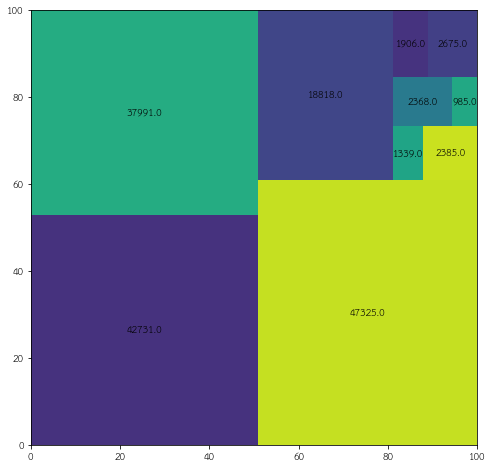

In [46]:
squarify.plot(output[0],value=output[0])

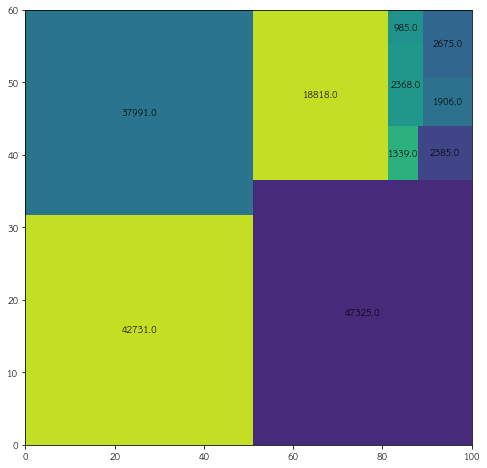

In [47]:
squarify.plot(output[0],value=output[0],norm_y=60)

# Radar Chart

In [48]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [49]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [50]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [51]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

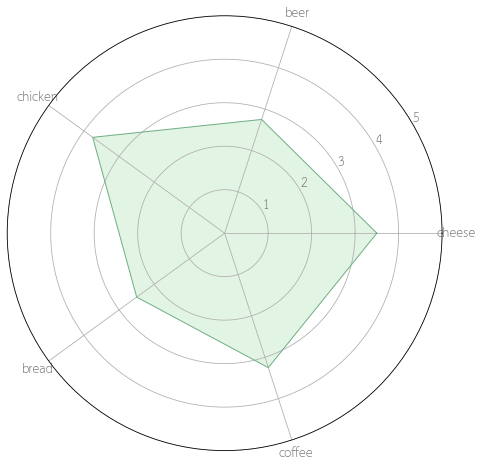

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#70af85') #เส้นกราฟ
ax.fill(angles, values, '#c6ebc9', alpha=0.5) #พื้นที่

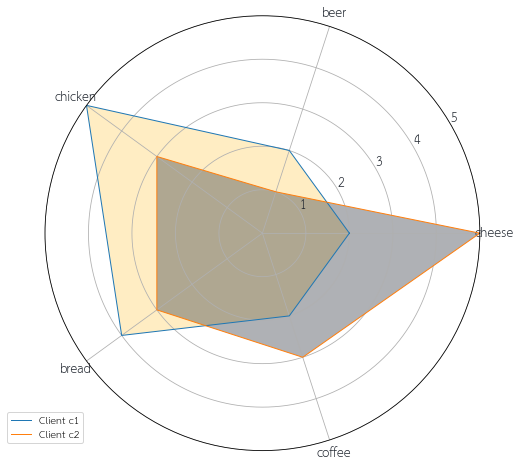

In [59]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='#222831', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='#222831', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, '#ffd369', alpha=0.4)
 
# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, '#393e46', alpha=0.4)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))